In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_rows', 500)

In [2]:
COMBINED_LANG_PATH = 'bbcm-lang-analysis_combined-all-posts-lang-annotations-20201014.csv' 
# TW_LANG_PATH = 'bbcm-lang-analysis_tw-all-posts-lang-annotations.csv' 

In [3]:
comb_lang_df = pd.read_csv(COMBINED_LANG_PATH)
# tw_lang_df = pd.read_csv(TW_LANG_PATH)

/Users/ay227/Desktop/first-trial/FT3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,6,8,10,13,14,16,17,18,21,22,24,25,28,31,34,36,39,40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
comb_lang_df.tail()
# tw_lang_df.tail()

,language,lookup.general/linkPrefix,lookup.general/account,twitter.user/id,twitter.user/createdAt,twitter.tweet/text,lookup.facebook/pageLink,twitter.tweet/lang,lookup.general/extracted_from_file,crowdtangle.account/id,...,combined/createdDate,lookup.general/social_media_type,combined/uniqueUserId,lookup/found,lookup.webcrawl/httpCode,twitter.user/screenName,lookup.general/extracted_from_col,lookup.webcrawl/resolvedUrl,twitter.tweet/created,lookup.general/name
388410,en,NaN,NaN,1.474914e+08,2010-05-24T08:11:05.000Z,China's State Council on Wednesday held a rece...,NaN,en,NaN,NaN,...,2020-10-01T09:39:30.000Z,NaN,tw-147491390,NaN,NaN,chinaorgcn,NaN,NaN,2020-10-01T09:39:30.000Z,NaN
388411,ca,NaN,NaN,1.474914e+08,2010-05-24T08:11:05.000Z,Alibaba's trade platforms attract over 68M com...,NaN,en,NaN,NaN,...,2020-10-01T09:40:26.000Z,NaN,tw-147491390,NaN,NaN,chinaorgcn,NaN,NaN,2020-10-01T09:40:26.000Z,NaN
388412,en,NaN,NaN,1.115875e+09,2013-01-24T03:18:59.000Z,#CGTNFirstVoice What does this year's Chinese ...,NaN,en,NaN,NaN,...,2020-10-01T09:41:13.000Z,NaN,tw-1115874631,NaN,NaN,CGTNOfficial,NaN,NaN,2020-10-01T09:41:13.000Z,NaN
388413,en,NaN,NaN,4.871190e+08,2012-02-09T01:10:18.000Z,China's railway passenger trips are expected t...,NaN,en,NaN,NaN,...,2020-10-01T09:42:23.000Z,NaN,tw-487118986,NaN,NaN,XHNews,NaN,NaN,2020-10-01T09:42:23.000Z,NaN
388414,en,NaN,NaN,3.340026e+07,2009-04-20T03:09:12.000Z,"Archbishop Paul Gallagher, the Vatican foreign...",NaN,en,NaN,NaN,...,2020-10-01T09:42:28.000Z,NaN,tw-33400255,NaN,NaN,ChinaPlusNews,NaN,NaN,2020-10-01T09:42:28.000Z,NaN


# The range of the years for tw 2009-2020 for bs and is for ongoing every day get the last two days 

In [5]:
# filter the date only as year-month-day
# set([','.join((i.split('-')[0],i.split('-')[1],i.split('-')[2].split('T')[0])).replace(',','-') for i in list(tw_lang_df['twitter.tweet/created'])])


In [6]:
# [datetime.datetime.date(i) for i in list(df['date'])] 

In [7]:
# pd.to_datetime(df['date'], errors='coerce')


In [8]:
# df = tw_lang_df.rename({'twitter.tweet/created':'tweet_date','twitter.user/id':'user_id'}, axis=1)
# df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [9]:
# lst = []
# lst = [i[0] for i in df[df.date.dt.year==2020].iterrows()]
# # get the list of users that tweeted in 2020
# for u in lst:
#     df.loc[u, 'active'] = 1


In [10]:
df = comb_lang_df.rename({'combined/createdDate':'createdDate',
                          'combined/uniqueUserId':'uniqueUserId',
                         'combined/userHandle':'userHandle',
                         'combined/text':'text'}, axis=1)

df['createdDate'] = pd.to_datetime(df['createdDate'], errors='coerce')


In [11]:
df_year= df[df.createdDate.dt.year==2020]
df_month = df_year[df_year.createdDate.dt.month==9]


In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 10)})


In [13]:
print(f'Total Number of users: {len(set(df.uniqueUserId))}')

Total Number of users: 339


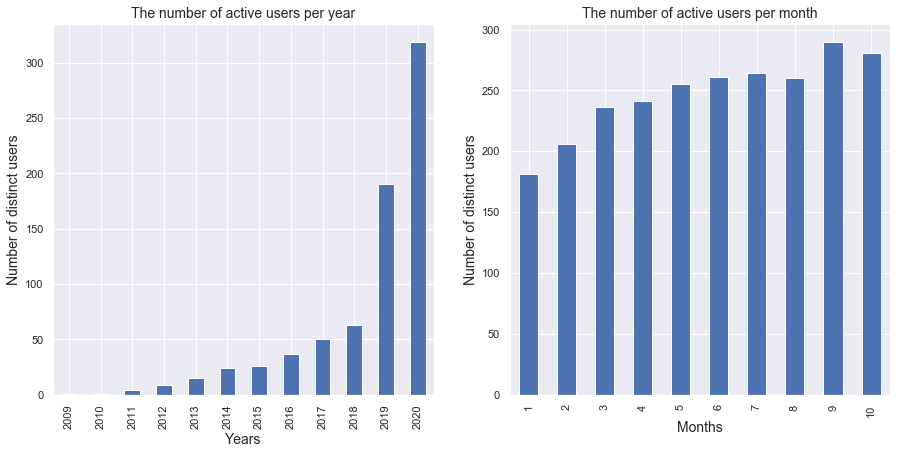

In [27]:
plt.figure(1)
# plt.figure.figure_size=(10,20)
plt.rcParams["figure.figsize"] = [15, 15]
plt.subplot(2,2,1)
plt.title('The number of active users per year',fontsize=14)
df.groupby(df.createdDate.dt.year)['uniqueUserId'].nunique().plot.bar()
plt.ylabel('Number of distinct users',fontsize=14)
plt.xlabel('Years',fontsize=14)

plt.subplot(2,2,2)
plt.title('The number of active users per month',fontsize=14)
df_year.groupby(df.createdDate.dt.month)['uniqueUserId'].nunique().plot.bar()
plt.ylabel('Number of distinct users',fontsize=14)
plt.xlabel('Months',fontsize=14)

plt.savefig('lang_analysis-20201015/Choosing the timeframe graphs.png')

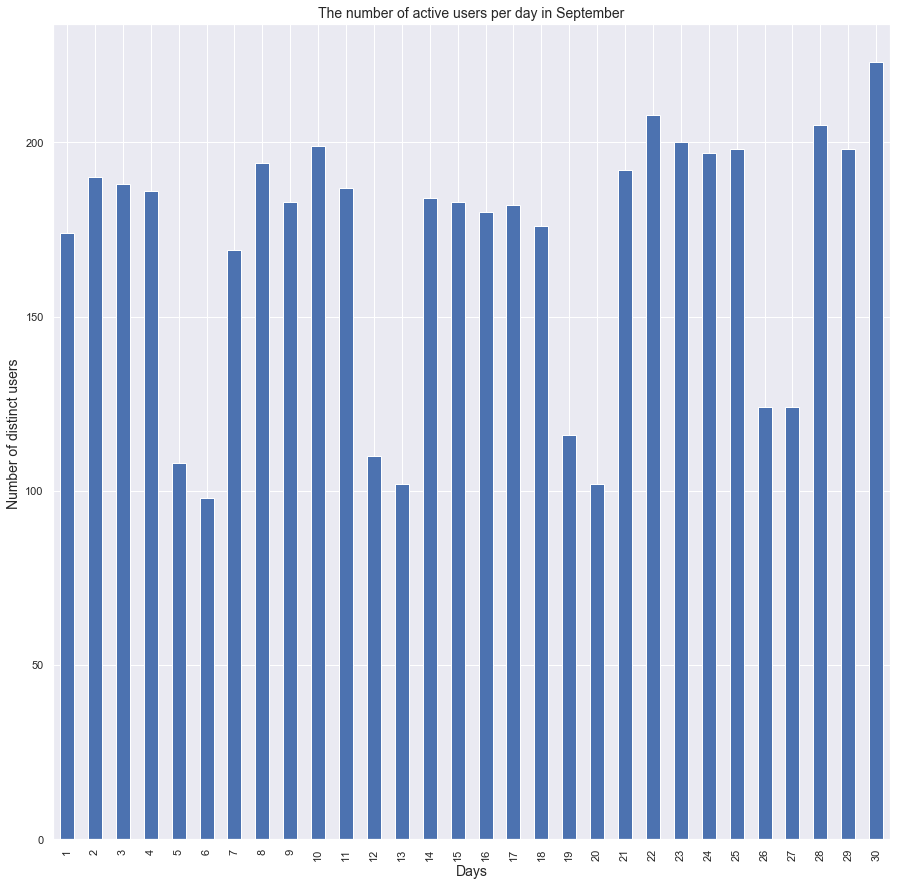

In [24]:
plt.title('The number of active users per day in September',fontsize=14)

df_month.groupby(df.createdDate.dt.day)['uniqueUserId'].nunique().plot.bar()
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of distinct users ',fontsize=14)
plt.savefig('lang_analysis-20201015/The number of active users per day in September.png')

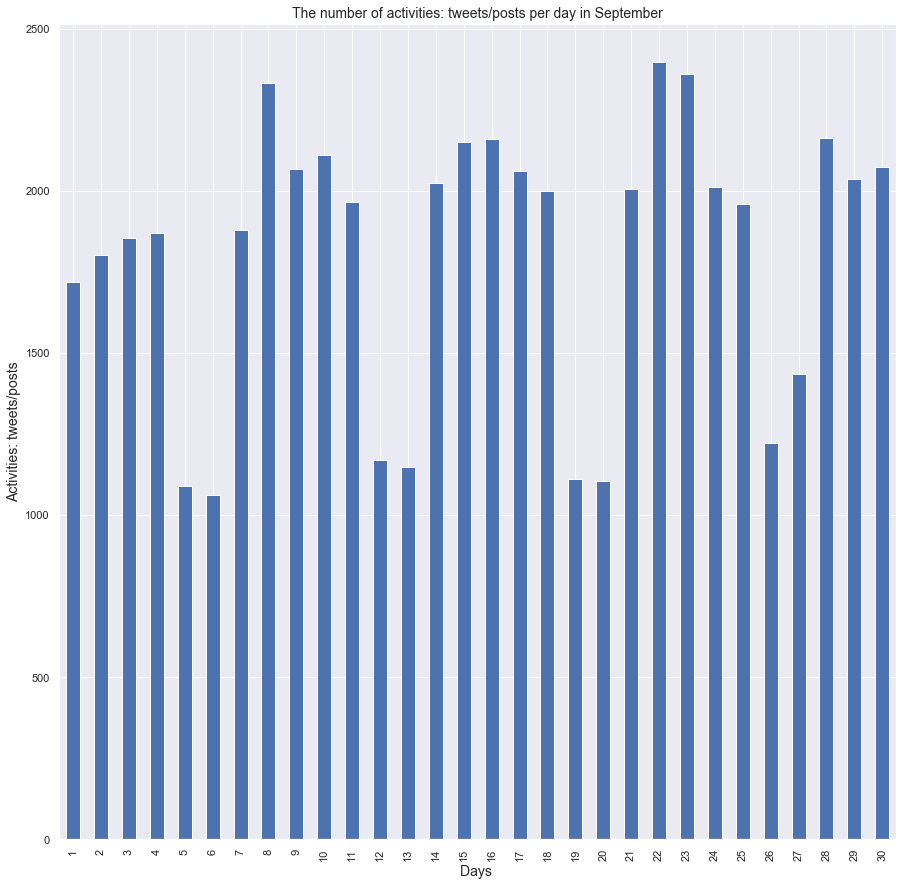

In [25]:
plt.title('The number of activities: tweets/posts per day in September',fontsize=14)

df_month.groupby(df_month.createdDate.dt.day)['uniqueUserId'].count().plot.bar()
plt.xlabel('Days ',fontsize=14)
plt.ylabel('Activities: tweets/posts',fontsize=14)

plt.savefig('lang_analysis-20201015/The number of activities: tweets-posts per day in September.png')

In [33]:
activity_per_day = df_month.groupby(df_month.createdDate.dt.day)['uniqueUserId'].count().reset_index()
activity_per_day= activity_per_day.rename({'createdDate':'Days','uniqueUserId':'rate_of_activity_per_day',}, axis=1)
activity_per_day['rate_of_activity_per_day'] =round(activity_per_day['rate_of_activity_per_day']/30,3)

activity_per_day.to_csv('lang_analysis-20201015/rate_of_activity_per_day.csv', index = False)

In [36]:
user_acitvity_per_day = round(df_month.groupby('userHandle')['createdDate'].count()/30,3).reset_index()
user_acitvity_per_day= user_acitvity_per_day.rename({'createdDate':'rate_of_user_activity_per_day'}, axis=1)
user_acitvity_per_day = user_acitvity_per_day.replace('fb-','fb-N/A')
user_acitvity_per_day.to_csv('lang_analysis-20201015/rate_of_user_activity_per_day.csv', index = False)

,userHandle,rate_of_user_activity_per_day
0,fb-N/A,0.500
1,fb-AmbChineCmr,1.733
2,fb-Ambasada.Chinei.in.Moldova,2.733
3,fb-AmbasadaChineiinRomania,6.033
4,fb-AmbassadeChine,2.467
5,fb-AmbassadedeChineenTunisie,0.800
6,fb-BCIUL,0.133
7,fb-BEEmbassyChina,0.467
8,fb-BrookesConfuciusInstitute,0.100
9,fb-CCDEdu,1.100


In [19]:
# %matplotlib inline
# plt.rcParams["figure.figsize"] = [30, 15]

In [ ]:
# df_month = df[df.date.dt.year==2020]

In [ ]:
# ax = df_month.plot.line(x='date', y='user', rot=0)


In [ ]:
# df.groupby(df.date.dt.year).count()

In [ ]:
# filter based on the year
# df.groupby(df.date.dt.year==2020).count()

In [ ]:
# .max() to get the maximum month
# df[df.date.dt.year==2020].groupby(df.date.dt.month).count()

In [ ]:
# year_df = df[df.date.dt.year==2009]

In [ ]:
# choose a specific month
# df[df.date.dt.year==2020][df[df.date.dt.year==2020].date.dt.month==9]

In [ ]:
# select the timeframe 
# df_masked = df[(df.date > '2012-04-01') & (df.date < '2012-04-04')]

In [ ]:
# that could be useful to get the days in the month
# import calendar
 
# c = calendar.Calendar()
# for date in c.itermonthdays(2016):
#   print(date)

In [ ]:

# The size of each step in days
# day_delta = datetime.timedelta(days=1)

# start_date = datetime.datetime(2020,1,1)
# end_date = datetime.datetime(2020,12,31)

# for i in range((end_date - start_date).days):
#     print(start_date + i*day_delta)